# Solving orbital equations with different algorithms

This notebook was adapted from `Orbit_games.ipynb`.



We consider energy plots and orbital solutions in Cartesian coordinates for the general potential energy

$\begin{align}
   U(r) = \frac{G m_1 m_2}{r^3}
\end{align}$


## Euler-Lagrange equation

For the dynamics of two orbiting bodies, we consider the Lagrangian with Cartesian coordinates $(x, y)$

$\begin{align}
  \mathcal{L} = \mathcal{T} - \mathcal{U} = \frac12 M (\dot X^2 + \dot Y^2) + (\frac12 \mu (\dot x^2 + \dot y^2) - U(x, y)) 
\end{align}$

$\begin{align}
\mathcal{L} = \mathcal{L_{CM}} + \mathcal{L_{Rel}} 
\end{align}$

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot X} = \frac{\partial\mathcal L}{\partial X}
  \;
\end{align}$


$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot Y} = \frac{\partial\mathcal L}{\partial Y}
  \;
\end{align}$


$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x} = \frac{\partial\mathcal L}{\partial x}
  \;
\end{align}$


$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y} = \frac{\partial\mathcal L}{\partial y}
  \;
\end{align}$


In each case above the **RHS** of the **Euler-Lagrange** equations is **0**

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot X} = \frac{\partial\mathcal L}{\partial X}
 \quad\Longrightarrow\quad
 m_2 L_2 \ddot \phi_2 + m_2 L_1 \ddot \phi_1 \cos(\phi_1 - \phi_2) + m_2 g \sin\phi_2 - m_2 L_1 \dot\phi_1^2 \sin(\phi_1 - \phi_2) = 0
  \;.
\end{align}$


$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot Y} = \frac{\partial\mathcal L}{\partial Y}
 \quad\Longrightarrow\quad
 (m_1 + m_2) L_1 \ddot \phi_1 + m_2 L_2 \ddot \phi_2 \cos(\phi_1 - \phi_2) + m_2 L_2 \dot\phi_2^2 \sin(\phi_1 - \phi_2) + (m_1 + m_2)g \sin\phi_1 = 0
 \
  \;.
\end{align}$


$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x} = \frac{\partial\mathcal L}{\partial x}
 \quad\Longrightarrow\quad
 m_2 L_2 \ddot \phi_2 + m_2 L_1 \ddot \phi_1 \cos(\phi_1 - \phi_2) + m_2 g \sin\phi_2 - m_2 L_1 \dot\phi_1^2 \sin(\phi_1 - \phi_2) = 0
  \;.
\end{align}$


$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y} = \frac{\partial\mathcal L}{\partial y}
 \quad\Longrightarrow\quad
 (m_1 + m_2) L_1 \ddot \phi_1 + m_2 L_2 \ddot \phi_2 \cos(\phi_1 - \phi_2) + m_2 L_2 \dot\phi_2^2 \sin(\phi_1 - \phi_2) + (m_1 + m_2)g \sin\phi_1 = 0
 \
  \;.
\end{align}$






**Look at the** `solve_ode_Leapfrog` **method below and verify the algorithm is correctly implemented.** 

A third method is the second-order Runge-Kutta algorithm, which we invoke from `solve_ivp` as `RK23`. 
It does not use a fixed time-step as in our "homemade" implementations, so there is not a direct 
comparison, but we can still check if it conserves energy.

**Run the notebook.  You are to turn in and comment on the "Change in energy with time" plot at the end.  
Where do you see energy conserved or not conserved?  Show that Euler is first order and leapfrog is second 
order by changing $\Delta t$; describe what you did and what you found.**

**Try another potential to see if you get the same general conclusions.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [6]:
# Dots per inch(dpi) affects the resolution of image and how
# large plots will appear on your screen.
plt.rcParams['figure.dpi'] = 100
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [17]:
class GravOrbitInCartCoords:
    """
    In this class we are implementing the use of Lagrange's equations for
    two orbiting bodies under gravitational potential. As in the first problem
    for the double pendulum we will give the arguments a value of unity for
    the methods.
    
    Arguments
    ---------
    m_1 : float
    m_2 : float
    G :   float
    
    Methods
    -------
    dq_dt(t, y)
        This method returns the right hand side of the ODE,
        given some time t and corresponding value of y.
    """
    
    def __init__(self, m_1=1., m_2=1., G=1.):
        self.m_1 = m_1
        self.m_2 = m_2
        self.G = G
        
    def dq_dt(self, t, q):
        """
        This function returns the right-hand side of the diffeq: 
        [dq/dt d^2q/dt^2]
        
        Parameters
        ----------
        t : float ---> time
        q : float ---> 8-component vector with:
                        q[0] = x_1(t) and q[1] = x_1dot(t)
                        q[2] = y_1(t) and q[3] = y_1dot(t)
                        q[4] = x_2(t) and q[5] = x_2dot(t)
                        q[6] = y_2(t) and q[7] = y_2dot(t)
        Returns
        -------
            the following:
        """
        r_12 = np.sqrt((q[0] - q[4])**2 + (q[2] - q[6])**2)  # Pythagorean Theorem
        
        return [q[1], self.G * self.m_2 * (q[4] - q[0])/r_12**3, \
                q[3], self.G * self.m_2 * (q[6] - q[2])/r_12**3, \
                q[5], -self.G * self.m_1 * (q[4] - q[0])/r_12**3, \
                q[7], -self.G * self.m_1 * (q[6] - q[2])/r_12**3, \
               ]
    
    
    def solve_ode(self, t_pts, q_0, abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given some set of initial conditions(IC).
        Specify smaller 'abserr' and 'relerr' to get more precision.
        """
        solution = solve_ivp(self.dq_dt, (t_pts[0], t_pts[-1]), 
                             q_0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        x_1, x_1dot, y_1, y_1dot, x_2, x_2dot, y_2, y_2dot = solution.y
        return x_1, x_1dot, y_1, y_1dot, x_2, x_2dot, y_2, y_2dot
    
### We will not attempt Euler's approximation method. But
### it may become useful somewhere else, so we just comment it out here
    
#     def solve_ode_(self, t_pts, r_0, r_dot_0, phi_0):
#         """
#         Solve the ODE given initial conditions with the Euler method.
#         The accuracy is determined by the spacing of times in t_pts.
#         """
        
#         delta_t = t_pts[1] - t_pts[0]
        
#         # initialize the arrays for r, rdot, phi with zeros
#         num_t_pts = len(t_pts)    # length of the array t_pts
#         r = np.zeros(num_t_pts)
#         r_dot = np.zeros(num_t_pts)
#         phi = np.zeros(num_t_pts)
        
#         # initial conditions
#         r[0] = r_0
#         r_dot[0] = r_dot_0
#         phi[0] = phi_0
        
#         # step through the differential equation
#         for i in np.arange(num_t_pts - 1):
#             t = t_pts[i]
#             y = [r[i], r_dot[i], phi[i]]
#             r[i+1] = r[i] + self.dy_dt(t,y)[0] * delta_t
#             r_dot[i+1] = r_dot[i] + self.dy_dt(t,y)[1] * delta_t 
#             phi[i+1] = phi[i] + self.dy_dt(t,y)[2] * delta_t
#         return r, r_dot, phi   

    def solve_ode_Leapfrog(self, t_pts, q_0):
        """
        Solve the ODE given some set of IC's with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x_1_0, x_1dot_0, y_1_0, y_1dot_0, x_2_0, x_2dot_0, y_2_0, y_2dot_0 = q_0
        
        # initialize the arrays with zeros
        num_t_pts = len(t_pts)   # number of points in time
        x_1 = np.zeros(num_t_pts)
        x_1dot = np.zeros(num_t_pts)
        x_1dot_h = np.zeros(num_t_pts)
        
        y_1 = np.zeros(num_t_pts)
        y_1dot = np.zeros(num_t_pts)
        y_1dot_h = np.zeros(num_t_pts)
        
        x_2 = np.zeros(num_t_pts)
        x_2dot = np.zeros(num_t_pts)
        x_2dot_h = np.zeros(num_t_pts)
        
        y_2 = np.zeros(num_t_pts)
        y_2dot = np.zeros(num_t_pts)
        y_2dot_h = np.zeros(num_t_pts)
        
        # initial conditions
        x_1[0] = x_1_0
        x_1dot[0] = x_1dot_0
        
        y_1[0] = y_1_0
        y_1dot[0] = y_1dot_0
        
        x_2[0] = x_2_0
        x_2dot[0] = x_2dot_0
        
        y_2[0] = y_2_0
        y_2dot[0] = y_2dot_0
        
        # this control flow statement steps through our ODE.
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            q = [x_1[i], x_1dot[i], y_1[i], y_1dot[i], x_2[i], x_2dot[i], y_2[i], y_2dot[i]]
            out = self.dq_dt(t, q)
            
            x_1dot_h[i] = x_1dot[i] + out[1] * delta_t/2.
            x_1[i+1] = x_1[i] + x_1dot_h[i] * delta_t
            
            y_1dot_h[i] = y_1dot[i] + out[3] * delta_t/2.
            y_1[i+1] = y_1[i] + y_1dot_h[i] * delta_t
            
            x_2dot_h[i] = x_2dot[i] + out[5] * delta_t/2.
            x_2[i+1] = x_2[i] + x_2dot_h[i] * delta_t
            
            y_2dot_h[i] = y_2dot[i] + out[7] * delta_t/2.
            y_2[i+1] = y_2[i] + y_2dot_h[i] * delta_t
            
            q = [x_1[i+1], x_1dot[i], y_1[i+1], y_1dot[i], x_2[i+1], x_2dot[i], y_2[i+1], y_2dot[i]]
            
            x_1dot[i+1] = x_1dot_h[i] + out[1] * delta_t/2.
            y_1dot[i+1] = y_1dot_h[i] + out[3] * delta_t/2.
            x_2dot[i+1] = x_2dot_h[i] + out[5] * delta_t/2.
            y_2dot[i+1] = y_2dot_h[i] + out[7] * delta_t/2.
        return x_1, x_1dot, y_1, y_1dot, x_2, x_2dot, y_2, y_2dot
    def solve_ode_Leapfrog_n(self, t_pts, q_0):
        """
        This method solves the ODE given a set of initial conditions using the Leapfrog
        method, but this works for some arbitrary number of points.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # begin to initialize the 'q' array with zeros
        # as in the Leapfrog method above.
        num_t_pts = len(t_pts)  # number of points in time
        n_tot = len(q_0)
        q = np.zeros(shape=(n_tot, num_t_pts)) # This way we don't get a dimension error.
        dot_h = np.zeros(int(n_tot/2))
        
        # IC's
        q[:, 0] = q_0
        
        # Control flow statement to step through our ODE.
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            q_new = q[:, i]
            output = np.asarray(self.dq_dt(t, q_new))   # np.asarray() will take our argument and turn it into an array
            
            dot_h = q_new[1::2] + output[1::2] * delta_t/2.
            q[0::2, i+1] = q_new[0::2] + dot_h * delta_t
            
            q_new[0::2] = q[0::2, i+1]
            output = np.asarray(self.dq_dt(t, q_new))
            
            q[1::2, i+1] = dot_h + output[1::2] * delta_t/2.
        
        return q

## Plotting!!
The following plot code was taken from "Double_Pendulum_Final.ipynb". Which originally belongs to course
instructor.

In [18]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [19]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Begin our 'Orbit Plot'

In [20]:
# Make labels for each plot axis
ax_lebel_orbits = (r'$x$', r'$y$')    # Simple x, y axis labels

# Plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

In [21]:
# Plotting time
t_start = 0.
t_end = 10.
delta_t = 0.01

G = 1.
m_1 = 1.
m_2 = 5.

# Create instance of our class
orb1 = GravOrbitInCartCoords(m_1, m_2, G)

# IC's with velocity=0.
x_1_0 = 1.
x_1dot_0 = -1.
y_1_0 = 1.
y_1dot_0 = 1.
x_2_0 = -(m_1/m_2) * x_1_0
x_2dot_0 = -(m_1/m_2) * x_1dot_0
y_2_0 = -(m_1/m_2) * y_1_0
y_2dot_0 = -(m_1/m_2) * y_1dot_0

q_0 = [x_1_0, x_1dot_0, y_1_0, y_1dot_0, x_2_0, x_2dot_0, y_2_0, y_2dot_0]
x_1, x_1dot, y_1, y_1dot, x_2, x_2dot, y_2, y_2dot = orb1.solve_ode(t_pts, q_0)

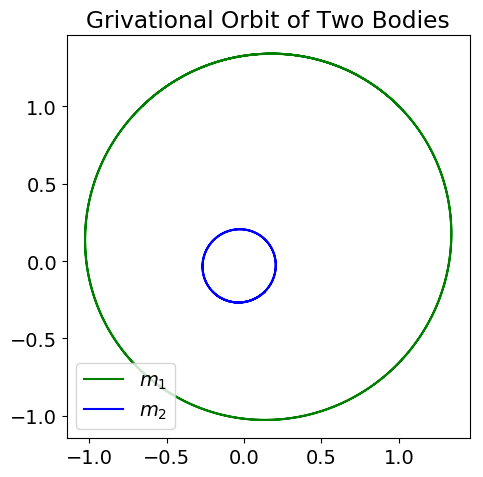

In [22]:
# Begin plotting
fig = plt.figure(figsize=(5, 5))  # Larger plot size because I'm super blind.

# first orbit plot
ax = fig.add_subplot(1, 1, 1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='green', label=r'$m_1$')
ax.plot(x_2, y_2, color='blue', label=r'$m_2$')
ax.set_title('Grivational Orbit of Two Bodies')
ax.legend()
ax.set_aspect(1)   # Scales our axes w.r.t x and y.


fig.tight_layout()
fig.savefig('Gravitational_Orb_2_Bodies.png', bbox_inches='tight')


In [23]:
# Plotting time
t_start = 0.
t_end = 20.
delta_t = 0.01

G_new = 1.
m_1_new = 1.
m_2_new = 1.

# Create instance of our class
orb2 = GravOrbitInCartCoords(m_1_new, m_2_new, G_new)

# IC's with velocity=0. Solved using Leapfrog method.
x_1_0 = 1.
x_1dot_0 = -1.
y_1_0 = 1.
y_1dot_0 = 1.
x_2_0 = -(m_1/m_2) * x_1_0
x_2dot_0 = -(m_1/m_2) * x_1dot_0
y_2_0 = -(m_1/m_2) * y_1_0
y_2dot_0 = -(m_1/m_2) * y_1dot_0

q_0 = [x_1_0, x_1dot_0, y_1_0, y_1dot_0, x_2_0, x_2dot_0, y_2_0, y_2dot_0]
x_1, x_1dot, y_1, y_1dot, x_2, x_2dot, y_2, y_2dot = orb2.solve_ode_Leapfrog_n(t_pts, q_0)

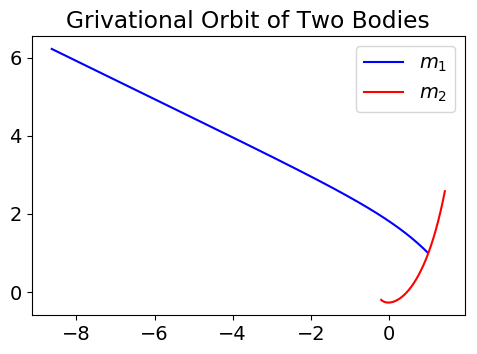

In [24]:
# Begin plotting
fig = plt.figure(figsize=(5, 5))  # Larger plot size because I'm super blind.

# Second orbit plot. Using Leapfrog method.
ax = fig.add_subplot(1, 1, 1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color='blue', label=r'$m_1$')
ax.plot(x_2, y_2, color='red', label=r'$m_2$')
ax.set_title('Grivational Orbit of Two Bodies')
ax.legend()
ax.set_aspect(1)   # Scales our axes w.r.t x and y.


fig.tight_layout()
fig.savefig('Gravitational_Orb_2_Bodies_Leapfrog_n_meth.png', bbox_inches='tight')


## Plot orbit and check energy conservation

In [16]:
# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
x_1_0 = 1.  #  1.
x_1dot_0 = 0.
r_pts, r_dot_pts, phi_pts = o1.solve_ode(t_pts, r_0, r_dot_0, phi_0)
r_pts_Euler, r_dot_pts_Euler, phi_pts_Euler \
                              = o1.solve_ode_Euler(t_pts, r_0, r_dot_0, phi_0)
r_pts_LF, r_dot_pts_LF, phi_pts_LF \
                           = o1.solve_ode_Leapfrog(t_pts, r_0, r_dot_0, phi_0)

c = o1.ang_mom**2 / (np.abs(o1.k) * o1.mu)
epsilon = c / r_0 - 1.
energy_0 = o1.mu/2. * r_dot_0**2 + o1.Ueff(r_0)
print(f'energy = {energy_0:.2f}')
print(f'eccentricity = {epsilon:.2f}')

NameError: name 'o1' is not defined

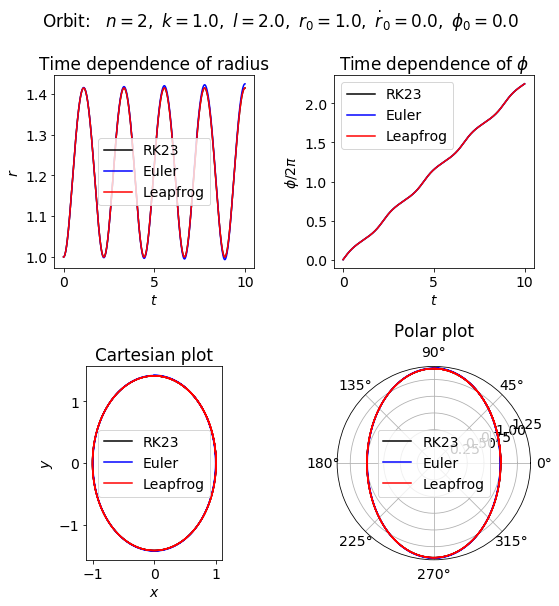

In [7]:
fig_4 = plt.figure(figsize=(8,8))

overall_title = 'Orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.1f},$' + \
                rf' $\phi_0 = {phi_0:.1f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(2,2,1)
ax_4a.plot(t_pts, r_pts, color='black', label='RK23')
ax_4a.plot(t_pts, r_pts_Euler, color='blue', label='Euler')
ax_4a.plot(t_pts, r_pts_LF, color='red', label='Leapfrog')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$r$')
ax_4a.set_title('Time dependence of radius')
ax_4a.legend()

ax_4b = fig_4.add_subplot(2,2,2)
ax_4b.plot(t_pts, phi_pts/(2.*np.pi), color='black', label='RK23')
ax_4b.plot(t_pts, phi_pts_Euler/(2.*np.pi), color='blue', label='Euler')
ax_4b.plot(t_pts, phi_pts_LF/(2.*np.pi), color='red', label='Leapfrog')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$\phi/2\pi$')
ax_4b.set_title(r'Time dependence of $\phi$')
ax_4b.legend()

ax_4c = fig_4.add_subplot(2,2,3)
ax_4c.plot(r_pts*np.cos(phi_pts), r_pts*np.sin(phi_pts), 
           color='black', label='RK23')
ax_4c.plot(r_pts_Euler*np.cos(phi_pts_Euler), 
           r_pts_Euler*np.sin(phi_pts_Euler), 
           color='blue', label='Euler')
ax_4c.plot(r_pts_LF*np.cos(phi_pts_LF), 
           r_pts_LF*np.sin(phi_pts_LF), 
           color='red', label='Leapfrog')
ax_4c.set_xlabel(r'$x$')
ax_4c.set_ylabel(r'$y$')
ax_4c.set_aspect('equal')
ax_4c.set_title('Cartesian plot')
ax_4c.legend()

ax_4d = fig_4.add_subplot(2,2,4, polar=True)
ax_4d.plot(phi_pts, r_pts, color='black', label='RK23')
ax_4d.plot(phi_pts_Euler, r_pts_Euler, color='blue', label='Euler')
ax_4d.plot(phi_pts_LF, r_pts_LF, color='red', label='Leapfrog')
ax_4d.set_title('Polar plot', pad=20.)
ax_4d.legend()


fig_4.tight_layout()
fig_4.savefig('Leapfrog_orbit_1.png', dpi=200, bbox_inches='tight')



In [8]:
E_tot_pts = o1.energy(t_pts, r_pts, r_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

E_tot_pts_Euler = o1.energy(t_pts, r_pts_Euler, r_dot_pts_Euler)
E_tot_0_Euler = E_tot_pts_Euler[0]
E_tot_rel_pts_Euler = np.abs((E_tot_pts_Euler - E_tot_0_Euler)/E_tot_0_Euler)

E_tot_pts_LF = o1.energy(t_pts, r_pts_LF, r_dot_pts_LF)
E_tot_0_LF = E_tot_pts_LF[0]
E_tot_rel_pts_LF = np.abs((E_tot_pts_LF - E_tot_0_LF)/E_tot_0_LF)


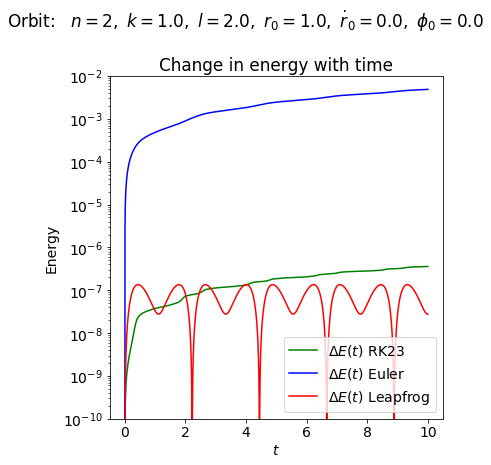

In [9]:
fig_5 = plt.figure(figsize=(6,6))

overall_title = 'Orbit:  ' + \
                rf' $n = {o1.n},$' + \
                rf' $k = {o1.k:.1f},$' + \
                rf' $l = {o1.ang_mom:.1f},$' + \
                rf' $r_0 = {r_0:.1f},$' + \
                rf' $\dot r_0 = {r_dot_0:.1f},$' + \
                rf' $\phi_0 = {phi_0:.1f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig_5.suptitle(overall_title, va='baseline')

ax_5a = fig_5.add_subplot(1,1,1)
#ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_5a.semilogy(t_pts, E_tot_rel_pts, 
               color='green', label=r'$\Delta E(t)$ RK23')
ax_5a.semilogy(t_pts, E_tot_rel_pts_Euler, 
               color='blue', label=r'$\Delta E(t)$ Euler')
ax_5a.semilogy(t_pts, E_tot_rel_pts_LF, 
               color='red', label=r'$\Delta E(t)$ Leapfrog')
ax_5a.set_ylim(1.e-10, 1.e-2)    # (1.e-12, 5)
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in energy with time')
ax_5a.legend()

fig_5.tight_layout()
fig_5.savefig('Leapfrog_energy_test_1.png', dpi=200, bbox_inches='tight')
